In [53]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datasets import load_dataset

In [54]:
boston = load_dataset("mrseba/boston_house_price")
columns = [    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.DataFrame(boston["train"], columns=columns)

df.head()

Repo card metadata block was not found. Setting CardData to empty.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [56]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [57]:
# % outliers in all columns
def outliers_percentage(df):
    outliers = {}
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers[col] = (outlier_count / len(df)) * 100
    return outliers
outliers = outliers_percentage(X_train)
# in ra tỉ lệ outliers
print("Tỉ lệ outliers trong các cột:")
for col, perc in outliers.items():
    print(f"{col}: {perc:.2f}%")

Tỉ lệ outliers trong các cột:
CRIM: 15.25%
ZN: 8.47%
INDUS: 0.00%
CHAS: 7.06%
NOX: 0.00%
RM: 5.08%
AGE: 0.00%
DIS: 0.85%
RAD: 0.00%
TAX: 0.00%
PTRATIO: 0.00%
B: 14.69%
LSTAT: 2.26%


In [58]:
# tiền xử lý dữ liệu
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# missing values
miss = X.isna().mean().sort_values(ascending=False)
print(f"Tỉ lệ missing values trong các cột:\n{(miss* 100).round(2)}%")

# chia dữ liệu thành tập train, validation và test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# DataPreprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])



Tỉ lệ missing values trong các cột:
CRIM       3.95
ZN         3.95
INDUS      3.95
CHAS       3.95
AGE        3.95
LSTAT      3.95
NOX        0.00
DIS        0.00
RM         0.00
RAD        0.00
TAX        0.00
PTRATIO    0.00
B          0.00
dtype: float64%


<Axes: >

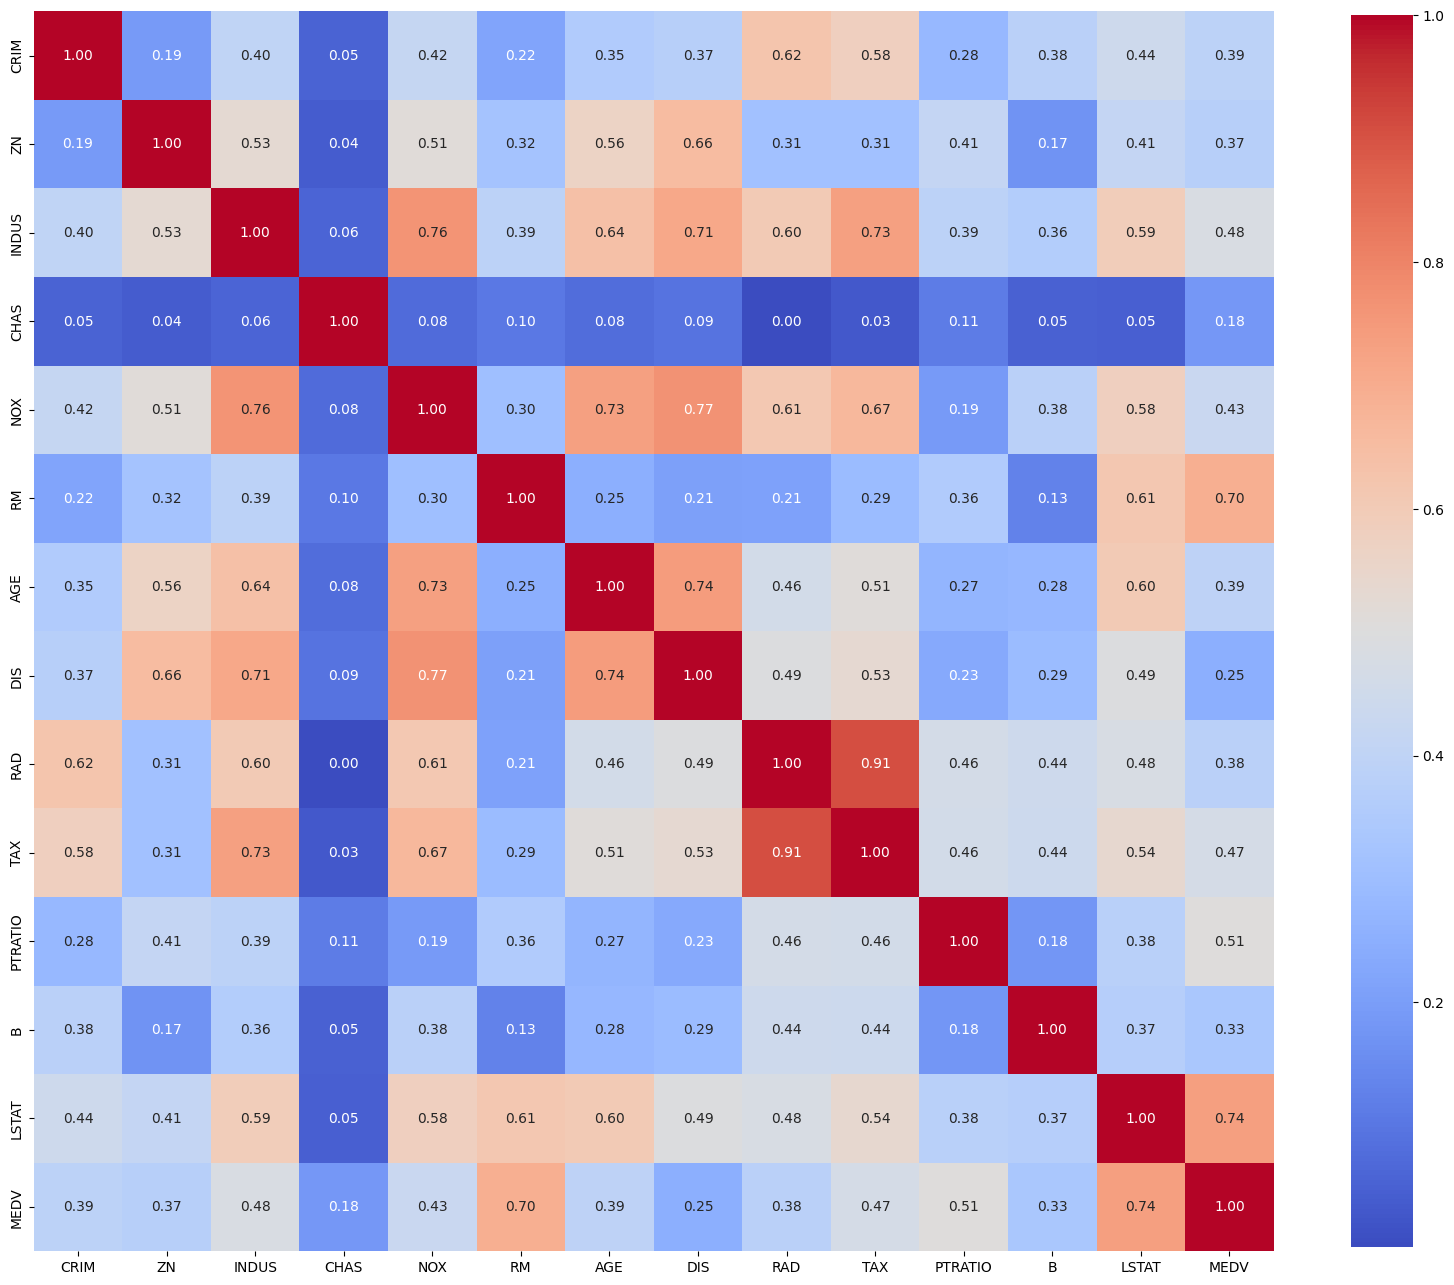

In [59]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr().abs(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

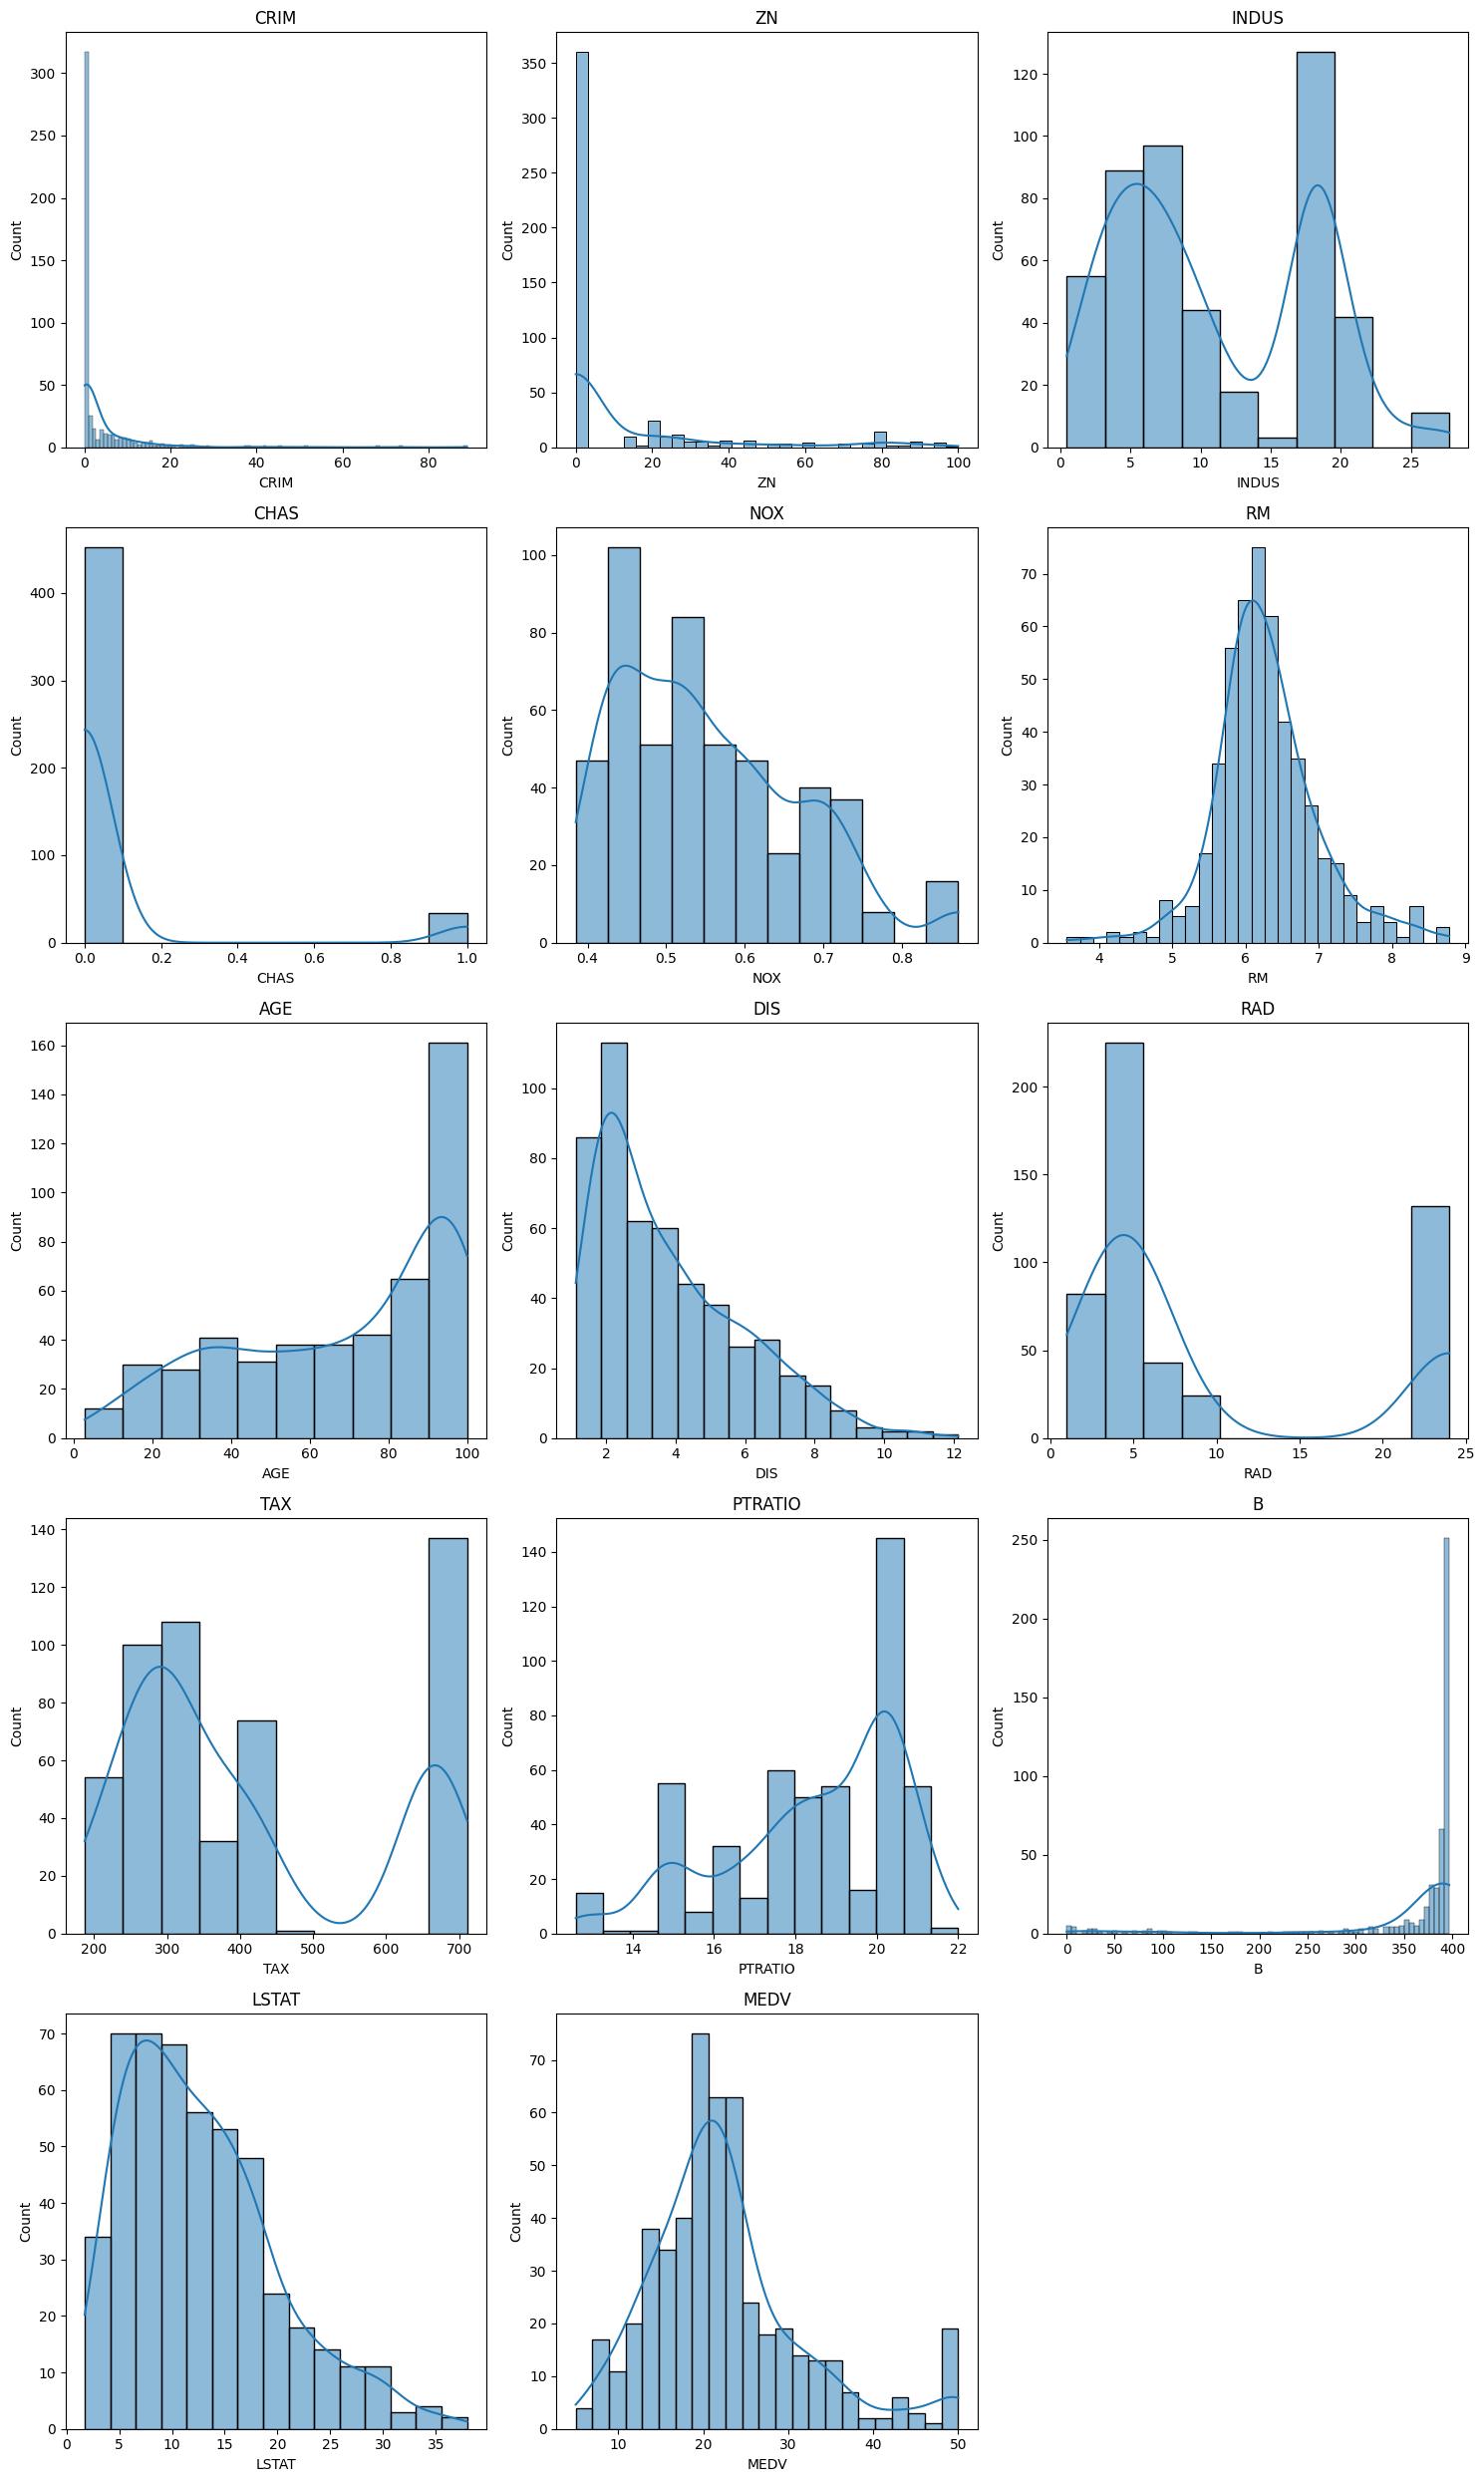

In [60]:
# create histogram of all columns in one figure
def plot_histograms(df):
    num_cols = df.select_dtypes(include=[np.number]).columns
    num_plots = len(num_cols)
    fig, axes = plt.subplots(nrows=(num_plots + 2) // 3, ncols=3, figsize=(15, 5 * ((num_plots + 2) // 3)))
    axes = axes.flatten()
    
    for i, col in enumerate(num_cols):
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(col)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
plot_histograms(df)


MSE: 15.41, RMSE: 3.93, R2: 0.78


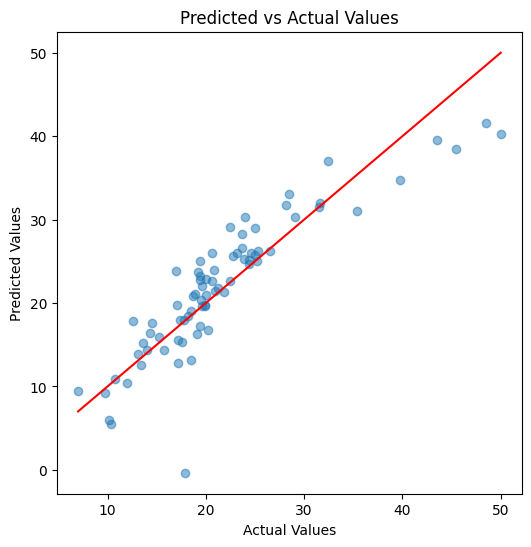

In [74]:
# create a linear regression model
model = LinearRegression()
# fit the model
pipeline.fit(X_train, y_train)
# evaluate the model (MSE, RMSE, R2, Accuracy, Precision, Recall)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = pipeline.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")
# plot the predicted vs actual values
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

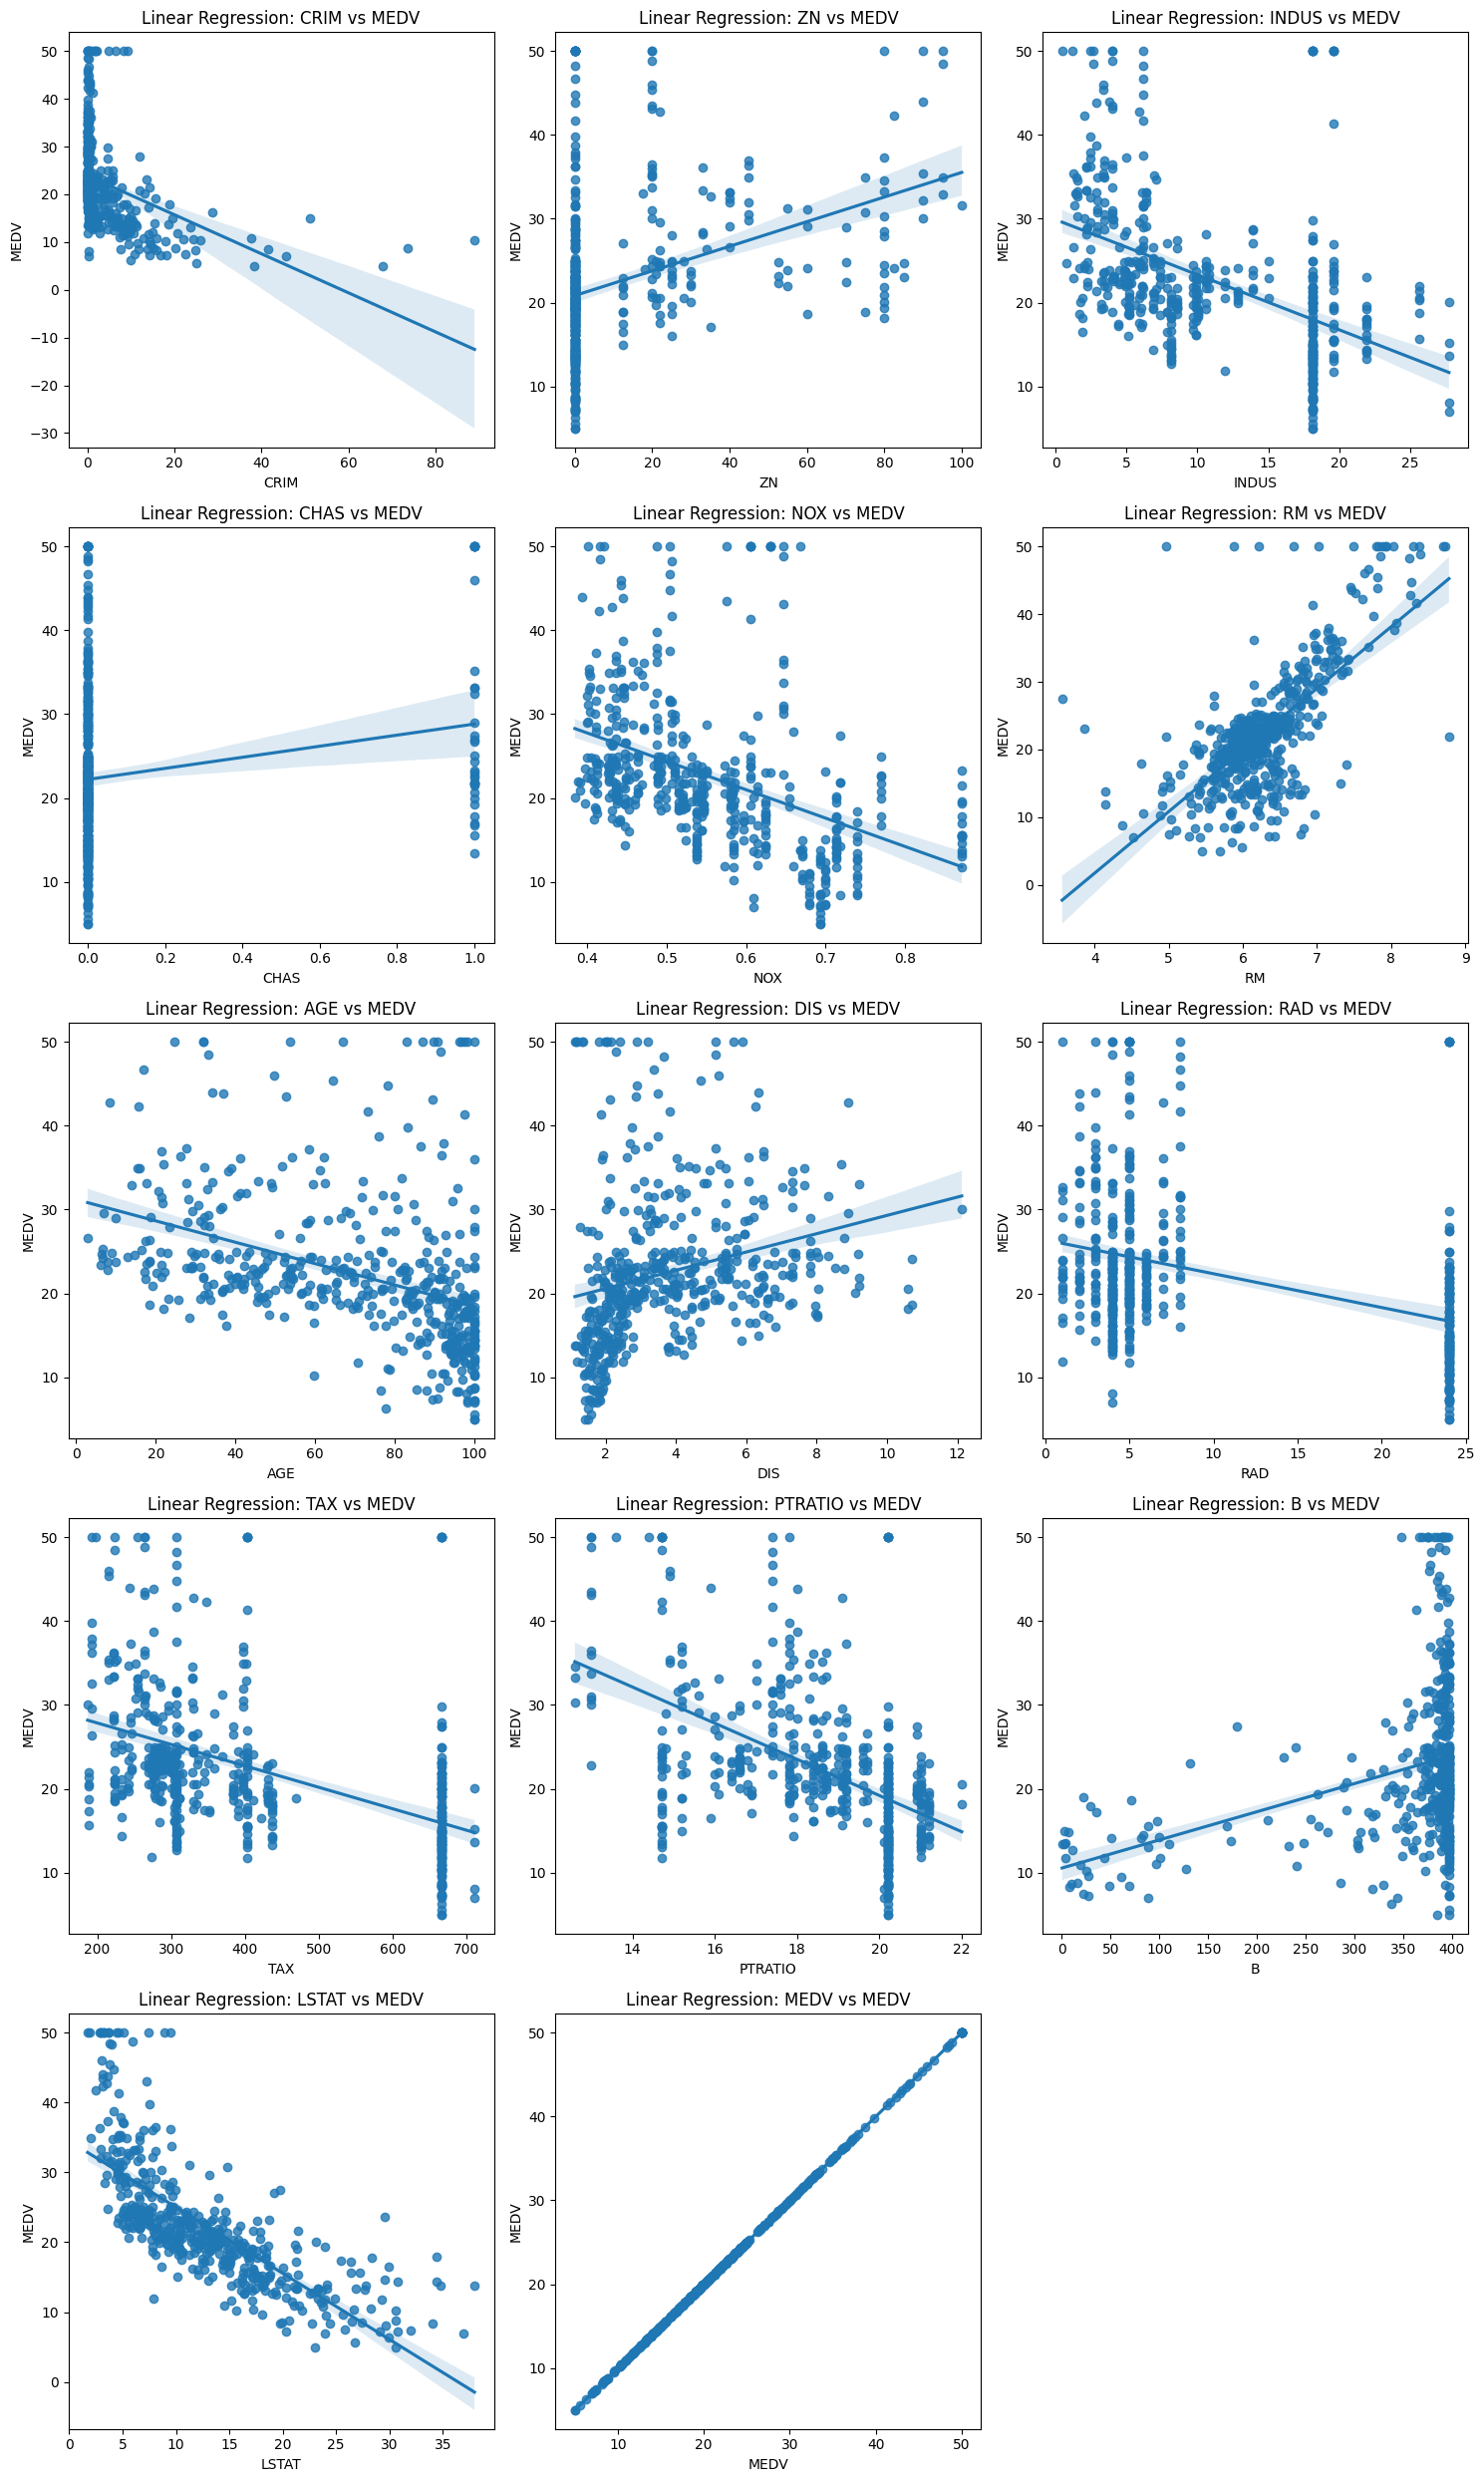

In [62]:
# all linear metrics of columns in one figure
def plot_linear_metrics(df):
    num_cols = df.select_dtypes(include=[np.number]).columns
    num_plots = len(num_cols)
    fig, axes = plt.subplots(nrows=(num_plots + 2) // 3, ncols=3, figsize=(15, 5 * ((num_plots + 2) // 3)))
    axes = axes.flatten()
    
    for i, col in enumerate(num_cols):
        sns.regplot(x=df[col], y=df["MEDV"], ax=axes[i])
        axes[i].set_title(f"Linear Regression: {col} vs MEDV")
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
plot_linear_metrics(df)